In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf

Using TensorFlow backend.
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
df = pd.read_csv('lending_club_loan_two.csv')

In [4]:
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Missing values

In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
df.corr()#["loan_status"]

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


# Missing values

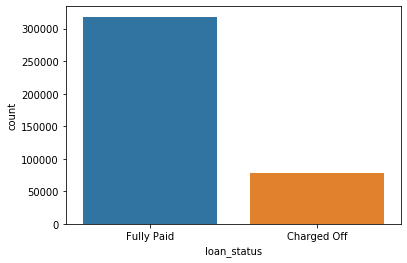

In [9]:
sns.countplot(df["loan_status"])

In [10]:
df["emp_title"].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
lead duct mechanic                        1
RN CNOR Lead RN Spine /Neurosurgery       1
SBS                                       1
Good Neigbor                              1
Southwest Securities, Inc                 1
Name: emp_title, Length: 173105, dtype: int64

In [11]:
df.drop(columns =['emp_title'],axis =1,inplace = True)

In [12]:
df["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [13]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

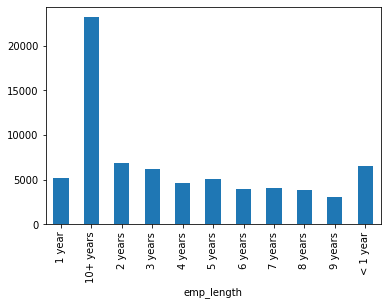

In [14]:
emp_co.plot(kind = 'bar')

In [15]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

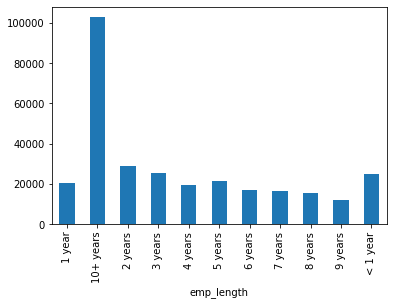

In [16]:
emp_fp.plot(kind = 'bar')

### There is no such difference , we wil drop this column

In [17]:
df.drop(columns =['emp_length'],axis =1,inplace = True)

In [18]:
df["title"]

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

### There is another column purpose which is same as title, so we can drop this column also, since it has missing values

In [19]:
df.drop(columns =['title'],axis =1,inplace = True)

### Next is mort_acc, this is no of martagage accounts. We can impute mean of all columns in this column, but lets see how this column is correlated with target variable as well with other independant variables

In [20]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [21]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

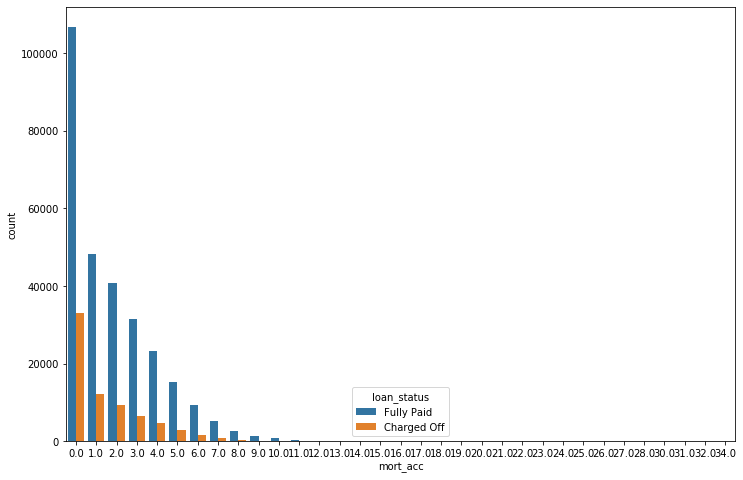

In [22]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'mort_acc',hue ='loan_status',data = df)
plt.show()

### We can see it is highly correlated with total_acc, we will fill the mean grouped by total_acc

In [23]:
acc_mean = df.groupby('total_acc').mean()['mort_acc']

In [24]:
acc_mean[2.0]

0.0

In [25]:
def fillmort(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return(acc_mean[total_acc])
    else:
        return mort_acc

In [26]:
df['mort_acc'] = df.apply(lambda x: fillmort(x['total_acc'],x['mort_acc']),axis =1)

In [27]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

### revol_util and pub_rec_bankruptcies have very few null values, we can drop the rows, it will not make any difference

In [28]:
df =df.dropna()

In [29]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

# Feature Engineering

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [31]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


### We will check all features one by one

### term

In [32]:
# remove 'months' and chnage data type to int
df['term'] = df['term'].apply(lambda x : int(x[:3]))

### grade and subgrade

In [33]:
df['grade'].value_counts()

B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: grade, dtype: int64

In [34]:
df['sub_grade'].value_counts()

B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64

### Looks like grade is subset of subgrade. We can drop either grade or subgrade.

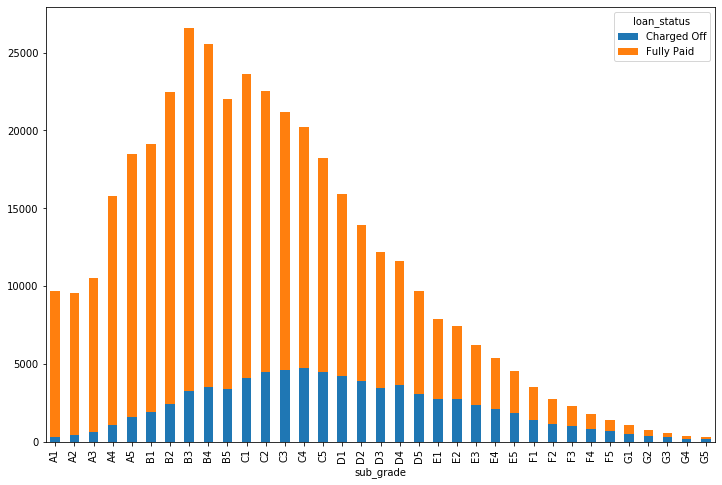

In [36]:
df.groupby(['sub_grade','loan_status'])['loan_status'].count().unstack().plot(kind ='bar',stacked = True,figsize = (12,8))

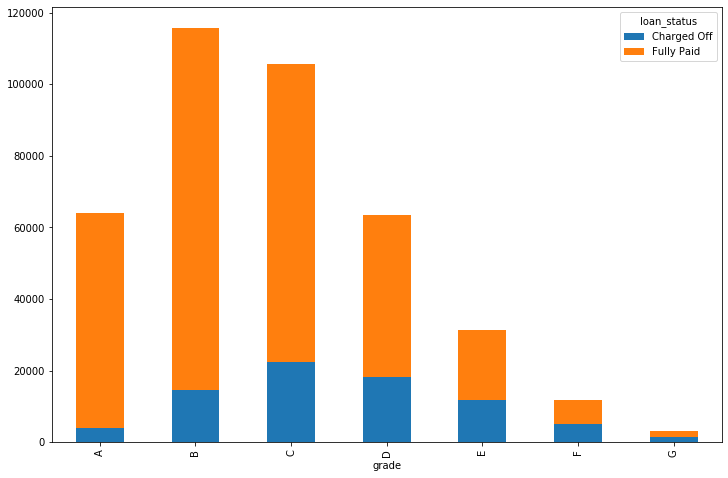

In [37]:
df.groupby(['grade','loan_status'])['loan_status'].count().unstack().plot(kind ='bar',stacked = True,figsize = (12,8))

### From above we can conclude that F and G grades do not pay the loan fully as compared to other grades. I will keep grade because it will create less dummy variables, and drop sub_grade

In [38]:
df.drop(columns = ['sub_grade'],axis =1,inplace = True)

In [39]:
df.select_dtypes(['object']).columns

Index(['grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [40]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [41]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

### We can combine Verified and Source verified as Verified.

In [42]:
df['verification_status'].replace(to_replace ='Source Verified',value ='Verified',inplace = True)

In [43]:
df['verification_status'].value_counts()

Verified        270752
Not Verified    124467
Name: verification_status, dtype: int64

In [44]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Nov-2007        1
Aug-2007        1
Oct-2007        1
Name: issue_d, Length: 112, dtype: int64

### we will Drop this column, since it does not make sense knowing issue date in advance if we need to predict loan status

In [45]:
df.drop(columns = ['issue_d'],axis =1,inplace = True)

In [46]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

### We can combine few categories into one 

In [47]:
df['purpose'].replace(to_replace  =['credit_card'],value ='debt_consolidation',inplace = True)
df['purpose'].replace(to_replace  =['home_improvement','moving','renewable_energy'],value ='other',inplace = True)
#.map({'credit_card' : 'debt_consolidation','home_improvement' : 'other','major_purchase':'other','moving':'other','renewable_energy':'other'})

In [48]:
df['purpose'].value_counts()

debt_consolidation    317092
other                  48191
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
vacation                2442
house                   2197
wedding                 1794
educational              246
Name: purpose, dtype: int64

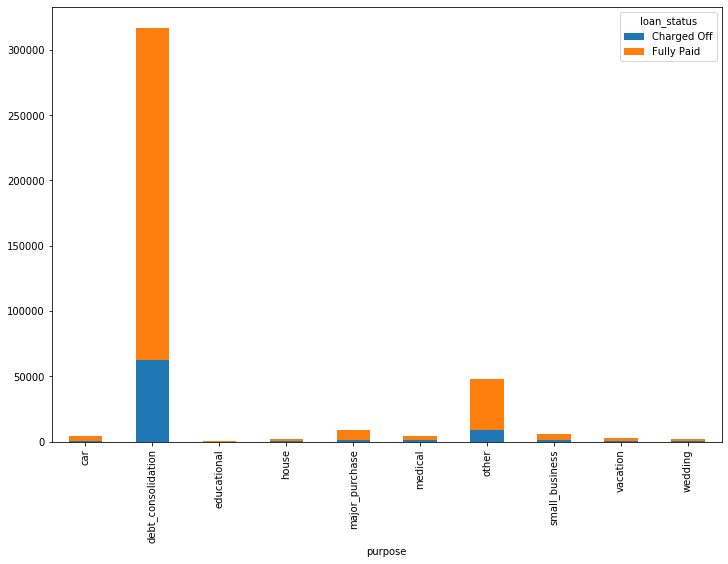

In [49]:
df.groupby(['purpose','loan_status'])['loan_status'].count().unstack().plot(kind ='bar',stacked = True,figsize = (12,8))

In [50]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Nov-1957       1
Oct-1961       1
Aug-1958       1
May-1955       1
Sep-1960       1
Name: earliest_cr_line, Length: 684, dtype: int64

### We will drop this column

In [51]:
df.drop(columns ='earliest_cr_line',axis =1,inplace = True)

In [52]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

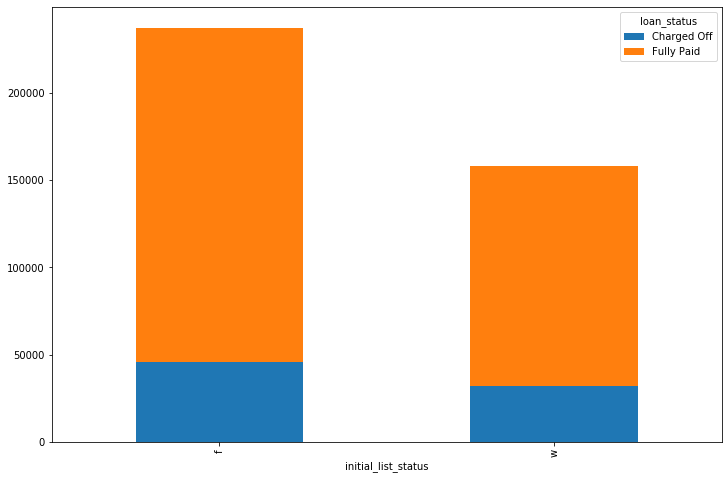

In [53]:
df.groupby(['initial_list_status','loan_status'])['loan_status'].count().unstack().plot(kind ='bar',stacked = True,figsize = (12,8))

In [54]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

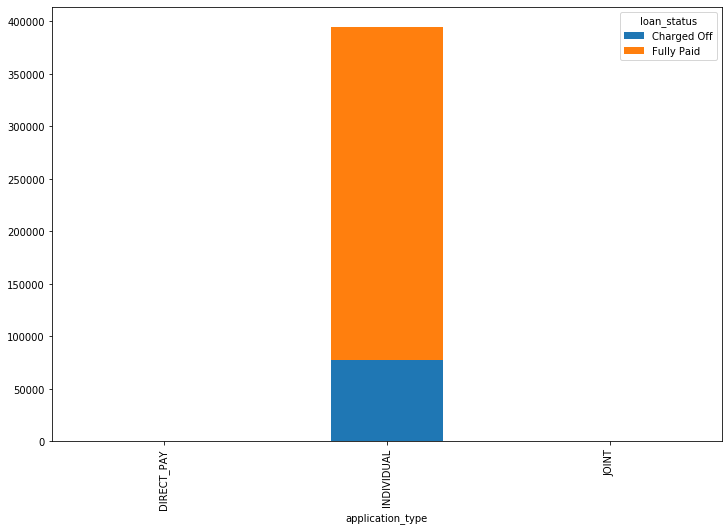

In [55]:
df.groupby(['application_type','loan_status'])['loan_status'].count().unstack().plot(kind ='bar',stacked = True,figsize = (12,8))

### We will drop address column, as it has nothing to do with loan

In [56]:
df.drop(columns =['address'],axis = 1, inplace = True)

### To check the correlation of loan status with the numeric variables, we need to change the values of the column to 0 and 1. We will create a new column 

In [57]:
df['loan_value'] = df['loan_status'].replace({'Fully Paid' : 1,'Charged Off':0})

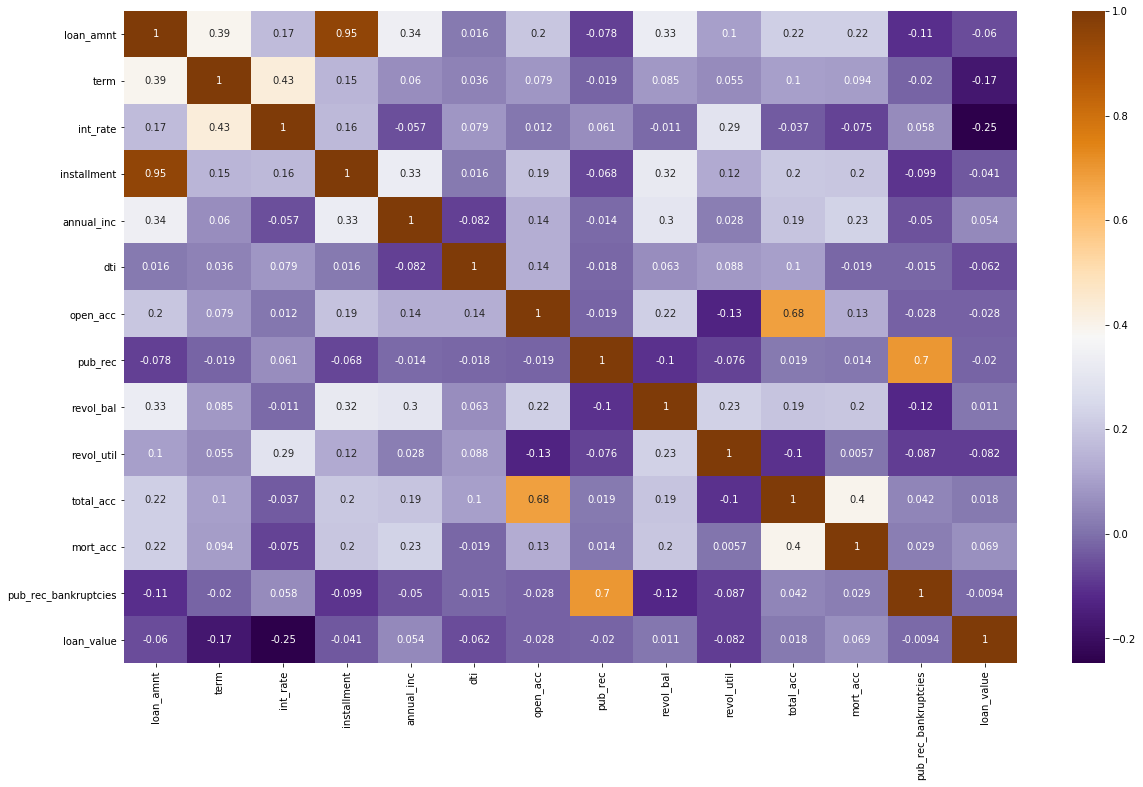

In [58]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),annot = True,cmap='PuOr_r')
plt.show()

## Observation 
### 1. loan_amnt is highly correlated with installment <br> 2. Loan value is inversely related with term and int rate. <br> 3. pub_rec_bankruptcies and pub_rec are highly correlated with each other and also hardly correlated with loan_value, we can drop them <br> 

In [59]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_value'],
      dtype='object')

In [61]:
df.drop(columns = ['pub_rec_bankruptcies','pub_rec'],axis = 1,inplace = True)

In [72]:
num_var =['loan_amnt','term','int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc','mort_acc','loan_value']

In [62]:
df.select_dtypes(['object']).columns

Index(['grade', 'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'initial_list_status', 'application_type'],
      dtype='object')

# Creating dummy variables

In [63]:
cat_var = ['grade','home_ownership','verification_status','purpose','initial_list_status','application_type']

In [64]:
# we will drop loan_status
df.drop(columns = ['loan_status'],axis = 1,inplace = True)

In [65]:
df.rename(columns ={'loan_value':'loan_repaid'},inplace = True)

In [66]:
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,loan_repaid
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,vacation,26.24,16.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,1
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,17.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,1
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Verified,debt_consolidation,12.79,13.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,1
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,debt_consolidation,2.60,6.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,1
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,debt_consolidation,33.95,13.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0


In [68]:
dummies = pd.get_dummies(df[cat_var])

In [69]:
df.drop(columns = cat_var,axis = 1,inplace = True)

In [70]:
df = pd.concat([df,dummies],axis = 1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loan_amnt                         395219 non-null  float64
 1   term                              395219 non-null  int64  
 2   int_rate                          395219 non-null  float64
 3   installment                       395219 non-null  float64
 4   annual_inc                        395219 non-null  float64
 5   dti                               395219 non-null  float64
 6   open_acc                          395219 non-null  float64
 7   revol_bal                         395219 non-null  float64
 8   revol_util                        395219 non-null  float64
 9   total_acc                         395219 non-null  float64
 10  mort_acc                          395219 non-null  float64
 11  loan_repaid                       395219 non-null  i

# Normalization

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
X = df.drop(columns = 'loan_repaid',axis = 1).values
y= df['loan_repaid'].values

In [75]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train test split

In [77]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [89]:
X_train.shape,y_train

((276653, 41), array([0, 1, 1, ..., 1, 1, 1], dtype=int64))

In [80]:
from keras.constraints import max_norm

# Modelling

In [81]:
model = Sequential()

In [82]:
#Layer 1
model.add(Dense(60,activation = 'relu'))
model.add(Dropout(0.2))

#Layer Hidden
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.2))

# Layer Hidden
model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.2))

#Layer output
model.add(Dense(units = 1,activation = 'sigmoid'))

#Compile
model.compile(optimizer='adam',loss = 'binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [85]:
X_train.shape,y_train.shape

((276653, 41), (118566, 41))

In [90]:
#fit the model

model.fit(x=X_train,y=y_train,batch_size=120,epochs = 100,validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 276653 samples, validate on 118566 samples
Epoch 1/100
276653/276653 [==============================] - 11s 38us/step - loss: 0.4686 - val_loss: 0.4575
Epoch 2/100
276653/276653 [==============================] - 9s 33us/step - loss: 0.4603 - val_loss: 0.4568
Epoch 3/100
276653/276653 [==============================] - 9s 33us/step - loss: 0.4589 - val_loss: 0.4569
Epoch 4/100
276653/276653 [==============================] - 9s 34us/step - loss: 0.4577 - val_loss: 0.4560
Epoch 5/100
276653/276653 [==============================] - 9s 34us/step - loss: 0.4570 - val_loss: 0.4562
Epoch 6/100
276653/276653 [==============================] - 10s 35us/step - loss: 0.4568 - val_loss: 0.4566
Epoch 7/100
276653/276653 [==============================] - 10s 34us/step - loss: 0.4564 - val_loss: 0.4555
Epoch 8/100
276653/276653 [==============================] - 10s 35us/step - loss: 0.4560 - val_loss: 0.4544
Epoch 9/100
276653/276653 [=====

Epoch 73/100
276653/276653 [==============================] - 10s 38us/step - loss: 0.4504 - val_loss: 0.4513
Epoch 74/100
276653/276653 [==============================] - 10s 35us/step - loss: 0.4505 - val_loss: 0.4523
Epoch 75/100
276653/276653 [==============================] - 10s 35us/step - loss: 0.4505 - val_loss: 0.4515
Epoch 76/100
276653/276653 [==============================] - 9s 34us/step - loss: 0.4505 - val_loss: 0.4520
Epoch 77/100
276653/276653 [==============================] - 9s 34us/step - loss: 0.4504 - val_loss: 0.4517
Epoch 78/100
276653/276653 [==============================] - 10s 35us/step - loss: 0.4503 - val_loss: 0.4517
Epoch 79/100
276653/276653 [==============================] - 11s 42us/step - loss: 0.4503 - val_loss: 0.4511
Epoch 80/100
276653/276653 [==============================] - 13s 46us/step - loss: 0.4505 - val_loss: 0.4515
Epoch 81/100
276653/276653 [==============================] - 13s 47us/step - loss: 0.4505 - val_loss: 0.4522
Epoch 82/100

In [92]:
from keras.models import load_model
model.save('keras_loan_model.h5')  

# Evaluation

In [94]:
losses = pd.DataFrame(model.history.history)

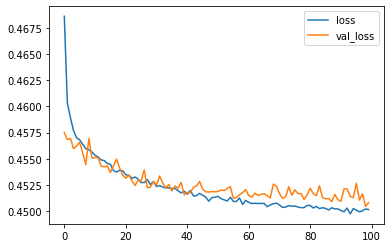

In [104]:
losses[['loss','val_loss']].plot()

In [96]:
from sklearn.metrics import classification_report,confusion_matrix

In [99]:
y_pred = model.predict_classes(X_test)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.02      0.05     23363
           1       0.81      1.00      0.89     95203

    accuracy                           0.80    118566
   macro avg       0.70      0.51      0.47    118566
weighted avg       0.76      0.80      0.72    118566



In [102]:
cm = confusion_matrix(y_test,y_pred)

In [103]:
print(cm)

[[  574 22789]
 [  405 94798]]
